In [6]:
#Question 1


SyntaxError: invalid syntax (Temp/ipykernel_30820/2368006619.py, line 3)

In [7]:
pip install quandl

In [8]:
import quandl as ql
import numpy as np
import pandas as pd
import time
from datetime import date
import matplotlib.pyplot as plt
import json
import requests
import statsmodels.formula.api as sm

In [9]:
#Extracting Quandl API and time series for SP500

In [9]:

ql.ApiConfig.api_key = "oxXok_gvcrYCctuZscAi"
Xt = pd.DataFrame(ql.get("MULTPL/SP500_REAL_PRICE_MONTH"))
Xt = Xt[ Xt.index > '2010-07-17'] 
Xt.reset_index(inplace=True)
ql.ApiConfig.api_key = "oxXok_gvcrYCctuZscAi"
Xt = pd.DataFrame(ql.get("MULTPL/SP500_REAL_PRICE_MONTH"))
Xt = Xt[ Xt.index > '2010-07-17'] 
Xt.reset_index(inplace=True)
Xt

,Date,Value
0,2010-08-01,1087.28
1,2010-09-01,1122.08
2,2010-10-01,1171.58
3,2010-11-01,1198.89
4,2010-12-01,1241.53
...,...,...
158,2022-02-01,4435.98
159,2022-02-28,4373.94
160,2022-03-01,4281.21
161,2022-03-31,4530.41


In [10]:
pip install cryptocompare

In [11]:
import cryptocompare
api_key = '45a671b07f7e280524342638a6a968a30d43fa508db3f409efc6d10ae1f112c9'
api_url = f'https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=2000&api_key={api_key}'
raw = requests.get(api_url).json()['Data']['Data']
Yt_df1 = pd.DataFrame(raw)[['time', 'open']].set_index('time')



In [12]:
ToTimeStamp = raw[0]['time']
api_url = f'https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=2000&toTs={ToTimeStamp}&api_key={api_key}'
raw1 = requests.get(api_url).json()['Data']['Data']
Yt_df2 = pd.DataFrame(raw1)[['time', 'open']].set_index('time')

In [13]:
ToTimeStamp = raw1[0]['time']
api_url = f'https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=2000&toTs={ToTimeStamp}&api_key={api_key}'
raw2 = requests.get(api_url).json()['Data']['Data']
Yt_df3 = pd.DataFrame(raw2)[['time', 'open']].set_index('time')
Yt_df = pd.concat([Yt_df3,Yt_df2,Yt_df1])
Yt_df.index = pd.to_datetime(Yt_df.index, unit = 's')
Yt_df = Yt_df[ Yt_df.index > '2010-07-17'] 
Yt_df.reset_index(inplace=True)
Yt_df.rename(columns ={'time':'Date'}, inplace='True')
Yt_df

,Date,open
0,2010-07-18,0.00
1,2010-07-19,0.00
2,2010-07-20,0.00
3,2010-07-21,0.00
4,2010-07-22,0.00
...,...,...
4301,2022-04-25,39466.26
4302,2022-04-26,40437.52
4303,2022-04-27,38117.39
4304,2022-04-28,39252.04


In [14]:
df = Xt.merge(Yt_df, how ='left', on='Date')
df.rename(columns ={'Value':'Xt','open':'Yt'}, inplace='True')
df

,Date,Xt,Yt
0,2010-08-01,1087.28,0.00
1,2010-09-01,1122.08,0.00
2,2010-10-01,1171.58,0.00
3,2010-11-01,1198.89,0.00
4,2010-12-01,1241.53,0.00
...,...,...,...
158,2022-02-01,4435.98,38494.66
159,2022-02-28,4373.94,37714.96
160,2022-03-01,4281.21,43189.46
161,2022-03-31,4530.41,47056.41


alpha = -26251.834761997598 
beta = 14.248053303493856


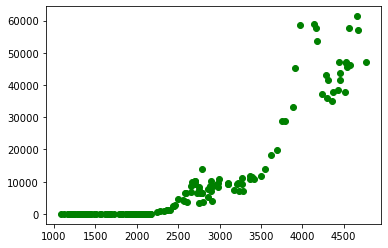

In [15]:
plt.plot(df.Xt,df.Yt,'go')
beta = ((np.multiply(df.Yt, df.Xt)).mean()-np.mean(df.Xt)*np.mean(df.Yt))/((np.multiply(df.Xt,df.Xt)).mean()-np.mean(df.Xt)*np.mean(df.Xt))
alpha =np.mean(df.Yt)-beta*np.mean(df.Xt)
print("alpha =",alpha, "\nbeta =",beta)

In [16]:
type((np.multiply(df.Yt, df.Xt)))
y_hat = alpha + np.multiply(beta,df.Xt)
L = np.sum(np.multiply(df.Yt - y_hat,df.Yt - y_hat))
L

10210543912.655014

In [17]:
def  cal_cost(a,b,x,y):
        n = len(y)
        predictions = a + np.multiply(b,x)
        cost = (1/2*n) * np.sum(np.square(predictions-y))
        return cost

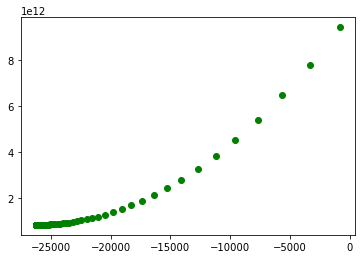

In [18]:
iterations = 1000
alpha = 2000
n = len(df.Yt)

loss_history = np.zeros((iterations,1))
alpha_history = np.zeros((iterations,1))

for i in range(iterations):
        prediction = alpha + np.multiply(beta,df.Xt)
        residuals = df.Yt-prediction
        residuals_sum = sum(residuals)
        gradient = -(1/n)*0.1*residuals_sum
 
        alpha = alpha - gradient
    
        loss_history[i] = cal_cost(alpha,beta,df.Xt,df.Yt)
        alpha_history[i] = alpha
    
plt.plot(alpha_history,loss_history,'go')

In [ ]:
#Question 4

In [21]:
l = '50'
pairs = ['BTC','BSV','ETH','BCH','LTC','EOS','XRP','BNB','XTZ','XLM','DOGE']
cryptocoins = pd.DataFrame()

crypto_key = "a17f916d63008ee55b8c04bafc789e69a64ca8528cdfd1a562c4358457103bf0"
for i in pairs:
    URL_A = 'https://min-api.cryptocompare.com/data/histoday?fsym='+i+'&tsym=USD&limit='+l+ '&api_key='
    URL = URL_A + crypto_key
    data = requests.get(URL)
    json_data = data.json()
    table = pd.json_normalize(json_data, 'Data').set_index('time')
    table.index = pd.to_datetime(table.index ,unit='s')
    cryptocoins = pd.concat([cryptocoins, table.high], axis=1)
cryptocoins.columns = pairs

cryptocoins.columns = pairs
cryptocoins = cryptocoins[pairs]
cryptocoins.head()

,BTC,BSV,ETH,BCH,LTC,EOS,XRP,BNB,XTZ,XLM,DOGE
2022-03-10 00:00:00,42043.56,80.23,2733.49,308.89,107.04,2.106,0.7789,381.14,3.237,0.1916,0.1218
2022-03-11 00:00:00,40221.93,78.95,2667.32,294.78,106.97,2.018,0.8128,380.10,3.109,0.1854,0.1185
2022-03-12 00:00:00,39414.02,78.43,2613.21,294.15,107.94,2.010,0.8487,379.25,3.088,0.1901,0.1173
2022-03-13 00:00:00,39254.88,78.69,2601.69,295.97,107.31,2.009,0.8044,377.25,3.088,0.1889,0.1163
2022-03-14 00:00:00,39802.89,79.15,2608.14,289.83,106.29,1.978,0.7774,374.08,3.019,0.1810,0.1210


In [27]:
cryptocoins_lagged=cryptocoins.copy()
trailing_window_size = 1
for window in range(1, trailing_window_size +1):
    shifted = cryptocoins.shift(window)
    shifted.columns = [x + "_lag" + str(window) for x in cryptocoins.columns]
    
    cryptocoins_lagged = pd.concat((cryptocoins_lagged, shifted), axis=1)
cryptocoins_lagged = cryptocoins_lagged.dropna()
#Will print the lagged values of all the crytocurriences during thier first lagged series
cryptocoins_lagged.head()

,BTC,BSV,ETH,BCH,LTC,EOS,XRP,BNB,XTZ,XLM,...,BSV_lag1,ETH_lag1,BCH_lag1,LTC_lag1,EOS_lag1,XRP_lag1,BNB_lag1,XTZ_lag1,XLM_lag1,DOGE_lag1
2022-03-11 00:00:00,40221.93,78.95,2667.32,294.78,106.97,2.018,0.8128,380.10,3.109,0.1854,...,80.23,2733.49,308.89,107.04,2.106,0.7789,381.14,3.237,0.1916,0.1218
2022-03-12 00:00:00,39414.02,78.43,2613.21,294.15,107.94,2.010,0.8487,379.25,3.088,0.1901,...,78.95,2667.32,294.78,106.97,2.018,0.8128,380.10,3.109,0.1854,0.1185
2022-03-13 00:00:00,39254.88,78.69,2601.69,295.97,107.31,2.009,0.8044,377.25,3.088,0.1889,...,78.43,2613.21,294.15,107.94,2.010,0.8487,379.25,3.088,0.1901,0.1173
2022-03-14 00:00:00,39802.89,79.15,2608.14,289.83,106.29,1.978,0.7774,374.08,3.019,0.1810,...,78.69,2601.69,295.97,107.31,2.009,0.8044,377.25,3.088,0.1889,0.1163
2022-03-15 00:00:00,39863.78,76.59,2668.80,292.66,108.60,2.008,0.7765,374.85,3.019,0.1838,...,79.15,2608.14,289.83,106.29,1.978,0.7774,374.08,3.019,0.1810,0.1210


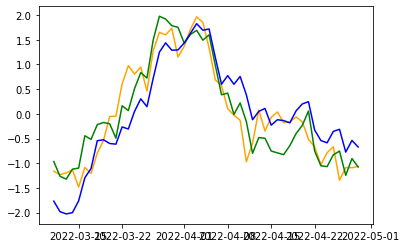

In [29]:
cryptocoins_lagged.to_csv('crypto_prices_data.csv', index_label='time')
df = pd.read_csv('crypto_prices_data.csv', index_col='time')
df.index = pd.to_datetime(df.index)
df.index = df.index.normalize()
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
sc_x = StandardScaler()
df_scaled = pd.DataFrame(sc_x.fit_transform(df), index=df.index, columns=df.columns)
#Will generate the graph of actual values of BSV, BTC and ETH.
plt.plot(df_scaled.index, df_scaled['BSV'], color='orange')
plt.plot(df_scaled.index, df_scaled['BTC'], color='green')
plt.plot(df_scaled.index, df_scaled['ETH'], color='blue')

In [32]:
split = int(int(l)/2)

Ytrain = pd.DataFrame(df_scaled[:split]['BTC'])
Ytest = pd.DataFrame(df_scaled[split:]['BTC'])

X = df_scaled[['BTC_lag1','BSV_lag1', 'ETH_lag1','BCH_lag1','LTC_lag1','EOS_lag1','XRP_lag1','BNB_lag1','XTZ_lag1','XLM_lag1','DOGE_lag1']]

from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha=0.1, normalize=False)
en.fit(X[:split], Ytrain)

ElasticNet(alpha=0.1)

In [33]:
coef = list(en.coef_)
coef

[0.22708049772661787,
 0.0,
 0.2225108819260462,
 0.0090042030502849,
 0.25014130984680055,
 0.057136893947421316,
 0.0,
 0.0,
 0.12637929972399634,
 0.025913098175222013,
 0.0]

In [34]:
count = 0
for i in X.columns:
    print(i, ':', coef[count])
    count = count + 1

BTC_lag1 : 0.22708049772661787
BSV_lag1 : 0.0
ETH_lag1 : 0.2225108819260462
BCH_lag1 : 0.0090042030502849
LTC_lag1 : 0.25014130984680055
EOS_lag1 : 0.057136893947421316
XRP_lag1 : 0.0
BNB_lag1 : 0.0
XTZ_lag1 : 0.12637929972399634
XLM_lag1 : 0.025913098175222013
DOGE_lag1 : 0.0


In [35]:
BTC_fitted = X.dot(coef)
BTC_fitted

time
2022-03-11   -0.818820
2022-03-12   -1.107302
2022-03-13   -1.197680
2022-03-14   -1.239812
2022-03-15   -1.260053
2022-03-16   -1.128666
2022-03-17   -0.729635
2022-03-18   -0.688378
2022-03-19   -0.437312
2022-03-20   -0.237264
2022-03-21   -0.162648
2022-03-22   -0.272754
2022-03-23    0.209491
2022-03-24    0.266793
2022-03-25    0.545743
2022-03-26    0.670721
2022-03-27    0.613780
2022-03-28    1.113665
2022-03-29    1.570061
2022-03-30    1.520638
2022-03-31    1.514193
2022-04-01    1.526252
2022-04-02    1.245377
2022-04-03    1.454499
2022-04-04    1.513976
2022-04-05    1.426510
2022-04-06    1.362602
2022-04-07    0.844381
2022-04-08    0.241281
2022-04-09    0.257267
2022-04-10   -0.048607
2022-04-11    0.123125
2022-04-12   -0.237911
2022-04-13   -0.648846
2022-04-14   -0.362984
2022-04-15   -0.277094
2022-04-16   -0.380849
2022-04-17   -0.262477
2022-04-18   -0.258701
2022-04-19   -0.408063
2022-04-20   -0.152505
2022-04-21   -0.042382
2022-04-22    0.019678
2022-0

In [36]:
BTC_actual = df_scaled[['BTC']]
BTC_actual

,BTC
time,
2022-03-11,-0.966203
2022-03-12,-1.263764
2022-03-13,-1.322377
2022-03-14,-1.120540
2022-03-15,-1.098113
2022-03-16,-0.444453
2022-03-17,-0.517179
2022-03-18,-0.218900
2022-03-19,-0.175952


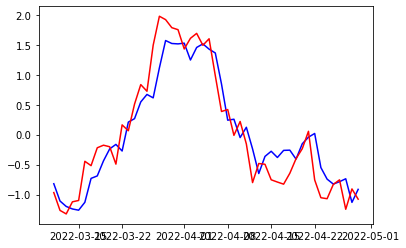

In [37]:
plt.plot(df_scaled.index, BTC_fitted, color='blue')
plt.plot(df_scaled.index, BTC_actual , color='red')

In [38]:
y = BTC_actual
X = BTC_fitted
y = y.values.reshape(-1,1)
X = X.values.reshape(-1,1)
sample_size = len(df_scaled)
squared_residuals = np.square(X-y)
sum_squared_residuals = np.sum(squared_residuals)
sum_squared_residuals

6.498880253987103

In [39]:
MSE = sum_squared_residuals/sample_size
MSE

0.12997760507974207

In [40]:
from sklearn.linear_model import LinearRegression
X = df_scaled[['BTC_lag1']]
y = df_scaled['BTC']
y = y.values.reshape(-1,1)
X = X.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,y)
print(lr.intercept_, lr.coef_)

[1.37648951e-15] [[0.93866091]]


In [41]:
forecast_BTC = lr.predict(X)
squared_residuals = np.square(forecast_BTC-y)
#Mean squared error using linear regression
MSE = (np.sum(squared_residuals))/len(y)
MSE

0.11891570476502224